In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from scipy import stats

In [8]:
import types
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('/content/indian_liver_patient.csv')

In [13]:
df.shape

(583, 11)

In [14]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [15]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [16]:

df.dtypes [df.dtypes=='object']

Gender    object
dtype: object

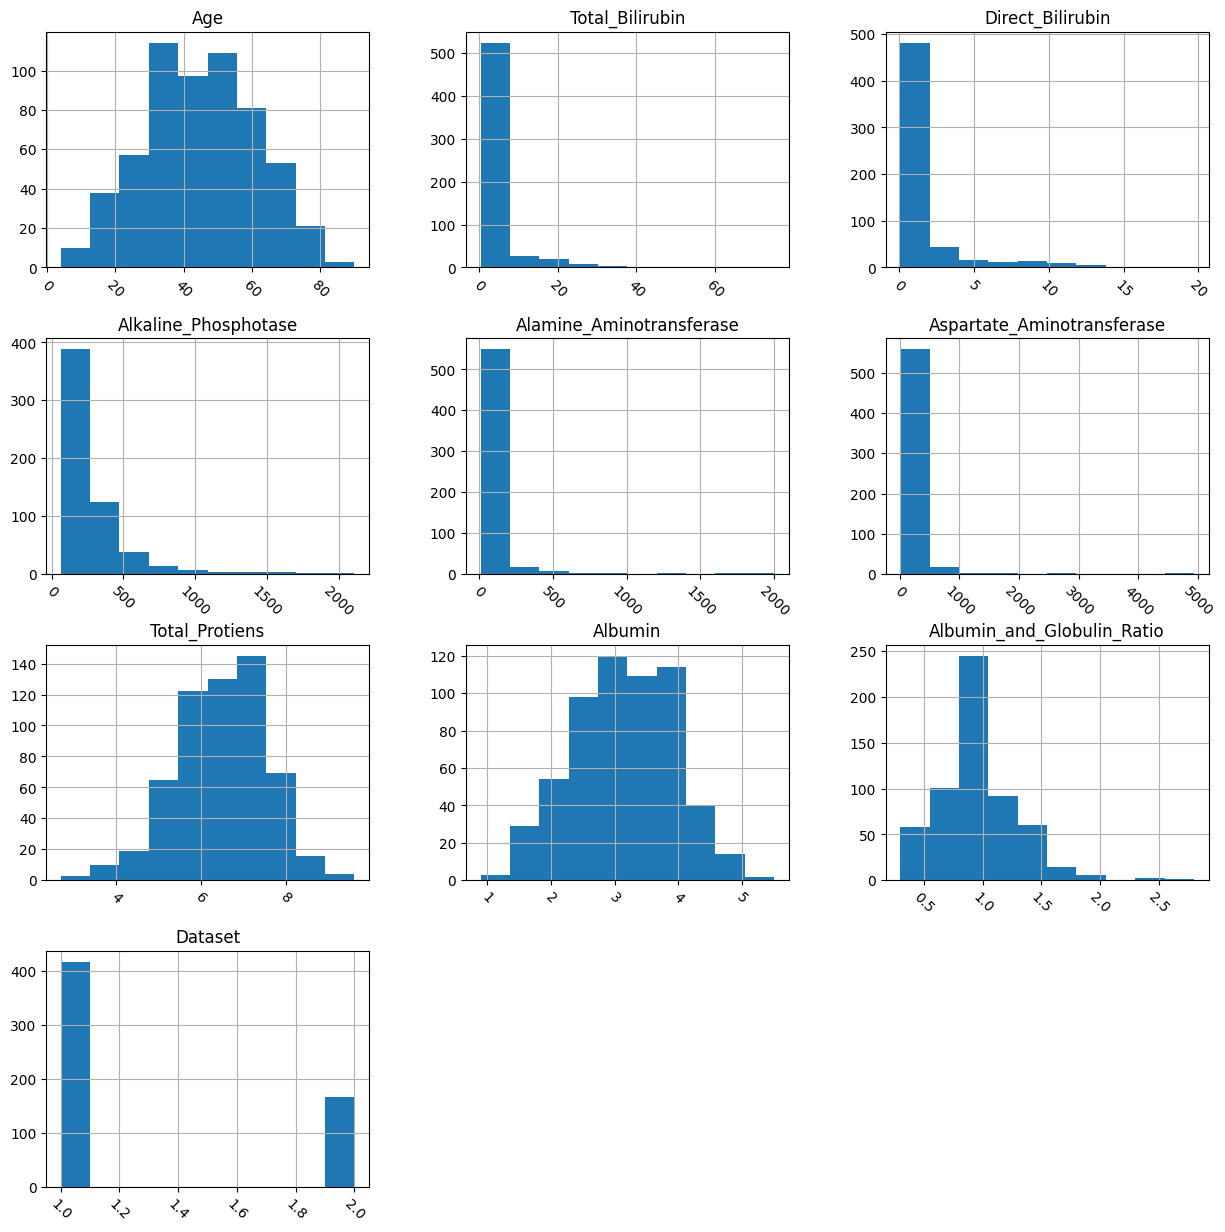

In [17]:
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress
plt.show()

In [18]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [19]:
def partition(x):
  if x ==2:
     return 0
  return 1
df['Gender'] = df['Gender'].map(partition)

<Axes: xlabel='Gender', ylabel='count'>

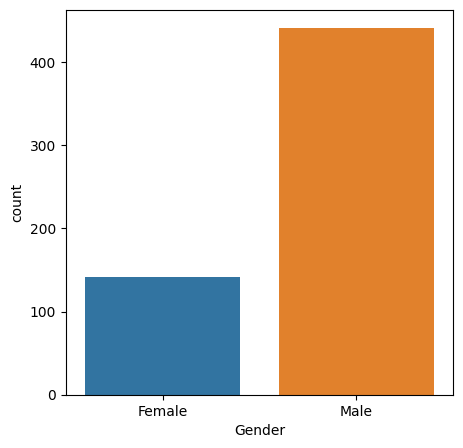

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=df)

In [ ]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


Number of patients that are male: 441
Number of patients that are female: 142


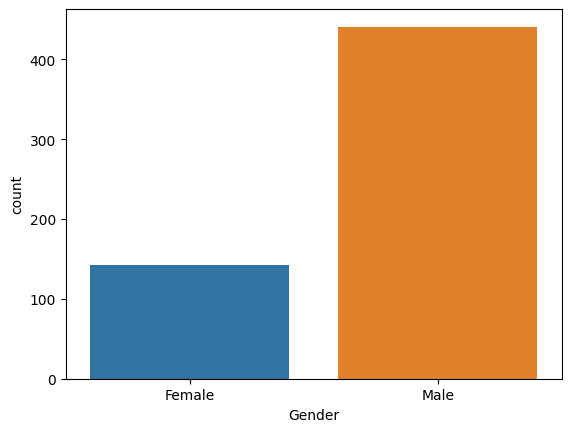

In [ ]:
sns.countplot(data=df,x='Gender',label='Count')
M,F=df['Gender'].value_counts()
print('Number of patients that are male:',M)
print('Number of patients that are female:',F)

In [ ]:
def partition(x):
  if x =='Male':
     return 0
  return 1
df['Gender'] = df['Gender'].map(partition)

In [ ]:
df=df.drop_duplicates()
print(df.shape)

(570, 11)


<Axes: >

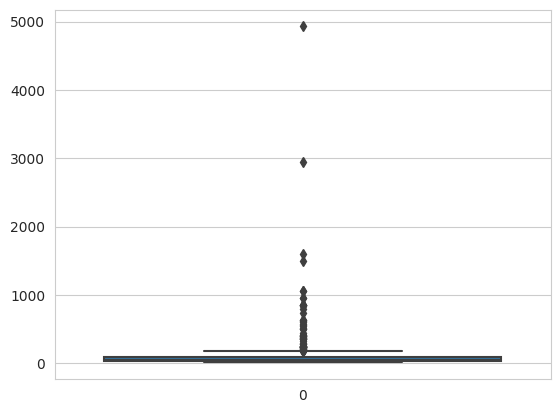

In [ ]:
sns.boxplot(df.Aspartate_Aminotransferase)

df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

In [ ]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df=df.dropna(how='any')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [24]:
y=df.Dataset
x=df.drop('Dataset', axis=1)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234,stratify=df.Dataset)

In [26]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(466, 10) (117, 10) (466,) (117,)


In [27]:
train_mean=x_train.mean()
train_std=x_train.std()

x_train= (x_train-train_mean) / train_std

In [28]:
x_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,466.000000,466.0,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,462.000000
mean,44.697425,1.0,3.310300,1.477039,291.060086,73.133047,103.027897,6.484335,3.148927,0.945498
std,15.745990,0.0,6.475524,2.846799,248.279899,161.265438,276.192985,1.115420,0.812807,0.308816
min,4.000000,1.0,0.400000,0.100000,75.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,1.0,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.0,1.000000,0.300000,206.000000,35.000000,41.000000,6.600000,3.100000,1.000000
75%,57.000000,1.0,2.400000,1.300000,291.500000,58.750000,83.750000,7.200000,3.800000,1.100000
max,90.000000,1.0,75.000000,19.700000,2110.000000,1680.000000,4929.000000,9.600000,5.500000,2.500000


In [40]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'],
as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
1,2,1,167
0,1,1,416


In [42]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'],
as_index=False).mean().sort_values(by='Dataset', ascending=False)


,Dataset,Gender,Age
1,2,1,41.239521
0,1,1,46.153846


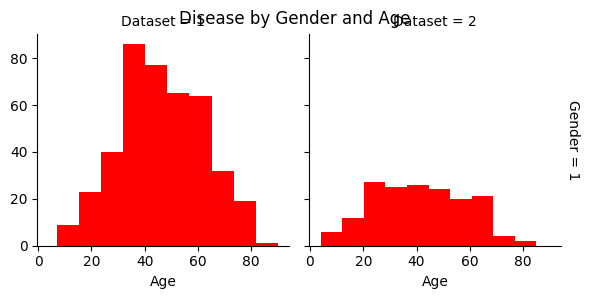

In [104]:
g = sns.FacetGrid(df, col="Dataset", row="Gender",margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

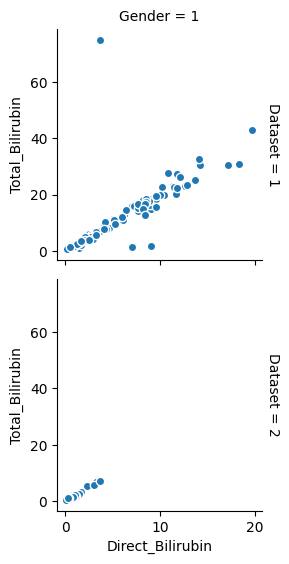

In [44]:
g = sns.FacetGrid(df, col="Gender", row="Dataset",
margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin",
edgecolor="w")
plt.subplots_adjust(top=0.9)

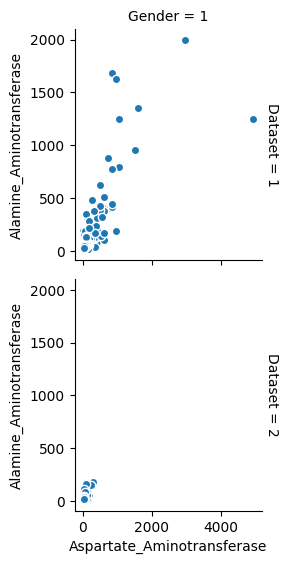

In [49]:
g = sns.FacetGrid(df, col="Gender", row="Dataset",
margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase",
"Alamine_Aminotransferase", edgecolor="w")
plt.subplots_adjust(top=0.9)

In [51]:
df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [52]:
pd.get_dummies(df['Gender'], prefix = 'Gender').head()


,Gender_1
0,1
1,1
2,1
3,1
4,1


In [53]:
df = pd.concat([df,pd.get_dummies(df['Gender'],
prefix = 'Gender')], axis=1)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_1
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [54]:
df.describe()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_1
count,583.000000,583.0,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.0
mean,44.746141,1.0,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,1.0
std,16.189833,0.0,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.0
min,4.000000,1.0,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,1.0
25%,33.000000,1.0,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,1.0
50%,45.000000,1.0,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,1.0
75%,58.000000,1.0,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,1.0
max,90.000000,1.0,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.0


In [55]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_1
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN,1,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1
312,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN,2,1


In [57]:
df["Albumin_and_Globulin_Ratio"] =df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [58]:
x= df.drop(['Gender','Dataset'], axis=1)
x.head(3)


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_1
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [60]:
y = df['Dataset']

In [61]:
df_corr = x.corr()
df_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_1
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,NaN
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,NaN
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,NaN
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,NaN
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,NaN
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,NaN
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,NaN
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,NaN
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,NaN
Gender_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


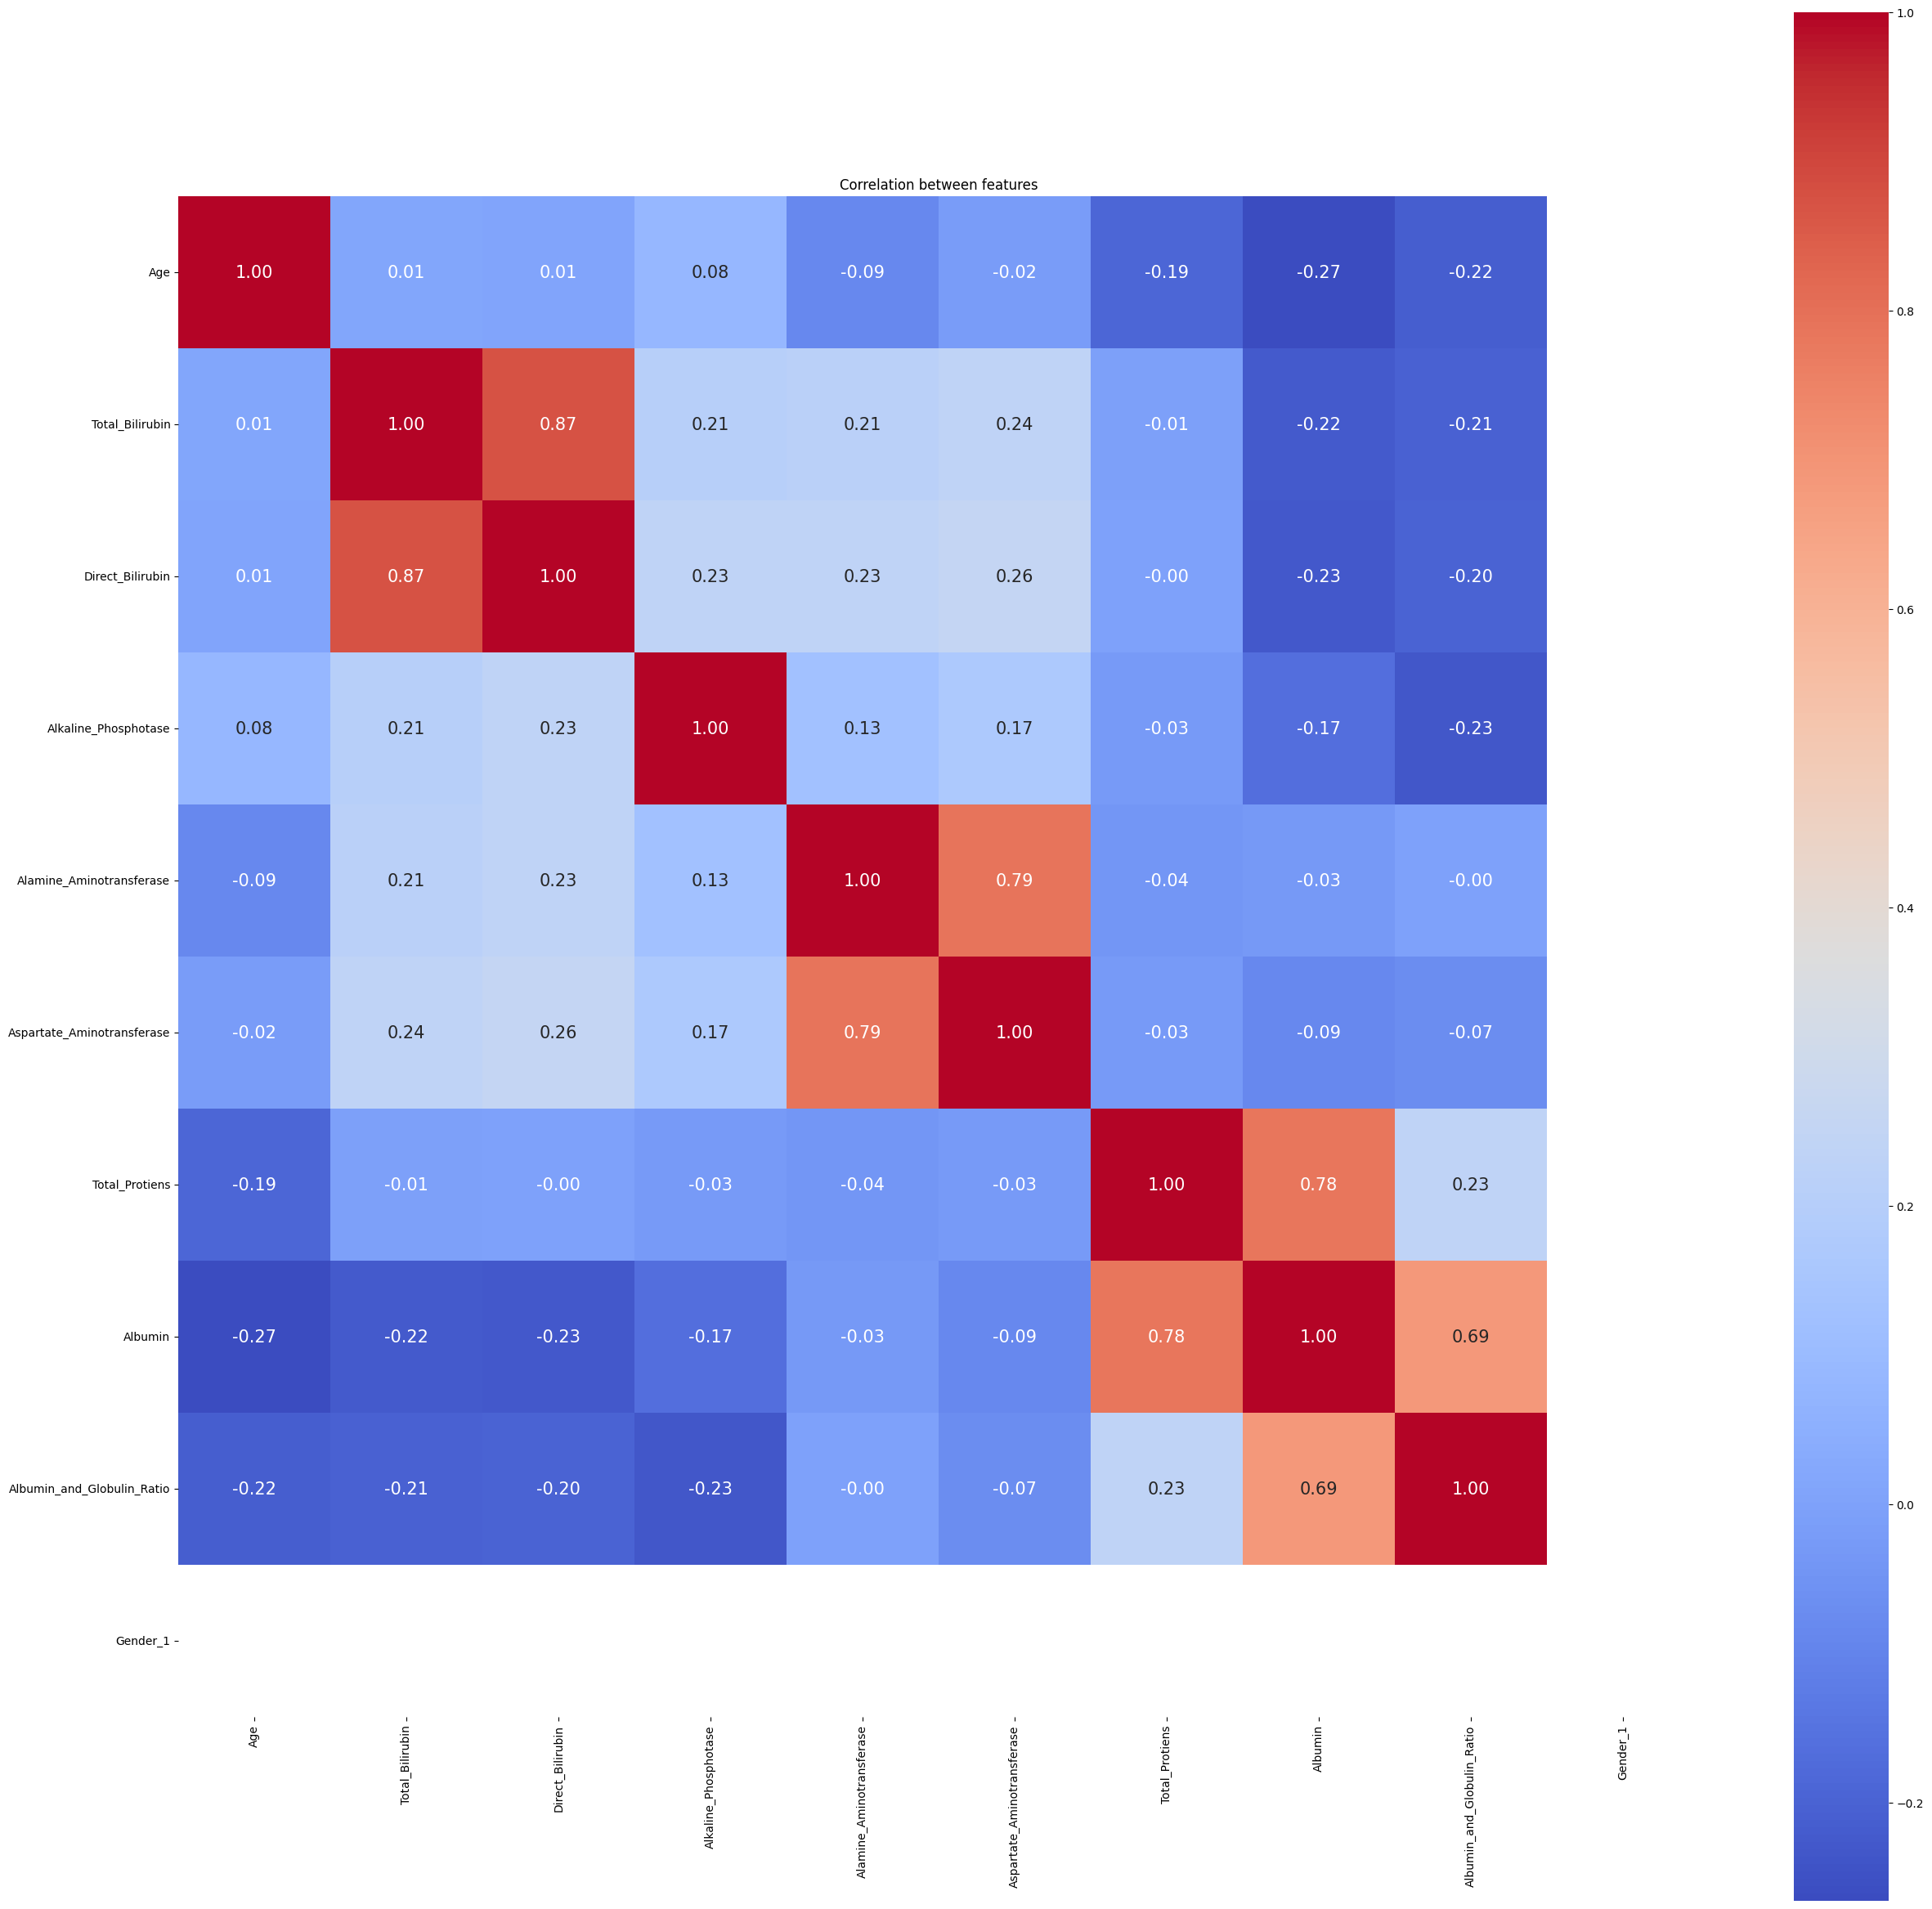

In [62]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_corr, cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.title('Correlation between features');

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=101)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)


(408, 10)
(408,)
(175, 10)
(175,)


In [66]:
logreg = LogisticRegression()


In [68]:
logreg.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False,fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr',n_jobs=1, penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [69]:
log_predicted= logreg.predict(x_test)
logreg_score = round(logreg.score(x_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(x_test, y_test) * 100, 2)


In [71]:
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n',
classification_report(y_test,log_predicted))


Logistic Regression Training Score: 
 73.28
Logistic Regression Test Score: 
 70.29
Coefficient: 
 [[-0.01454391 -0.02489109 -0.51308084 -0.00107513 -0.01069006 -0.00339519
  -0.22821001  0.19328966  0.66472978  0.64615464]]
Intercept: 
 [0.70069288]
Accuracy: 
 0.7028571428571428
Confusion Matrix: 
 [[107  17]
 [ 35  16]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.86      0.80       124
           2       0.48      0.31      0.38        51

    accuracy                           0.70       175
   macro avg       0.62      0.59      0.59       175
weighted avg       0.68      0.70      0.68       175



<Axes: >

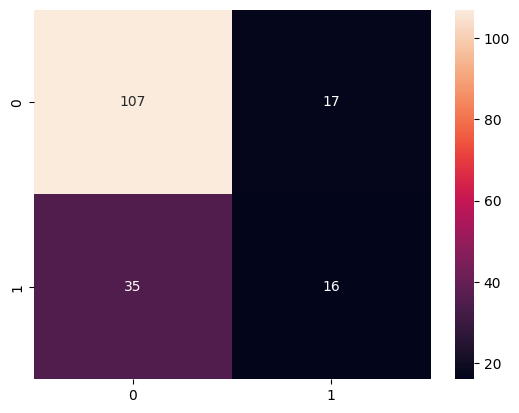

In [72]:
sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")


In [73]:
coeff_df = pd.DataFrame(x.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Albumin_and_Globulin_Ratio,0.664730
9,Gender_1,0.646155
7,Albumin,0.193290
3,Alkaline_Phosphotase,-0.001075
5,Aspartate_Aminotransferase,-0.003395
4,Alamine_Aminotransferase,-0.010690
0,Age,-0.014544
1,Total_Bilirubin,-0.024891
6,Total_Protiens,-0.228210
2,Direct_Bilirubin,-0.513081


In [75]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
GaussianNB(priors=None)
#Predict Output
gauss_predicted = gaussian.predict(x_test)
gauss_score = round(gaussian.score(x_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(x_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))


Gaussian Score: 
 55.88
Gaussian Test Score: 
 53.14
Accuracy: 
 0.5314285714285715
[[44 80]
 [ 2 49]]
              precision    recall  f1-score   support

           1       0.96      0.35      0.52       124
           2       0.38      0.96      0.54        51

    accuracy                           0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175



<Axes: >

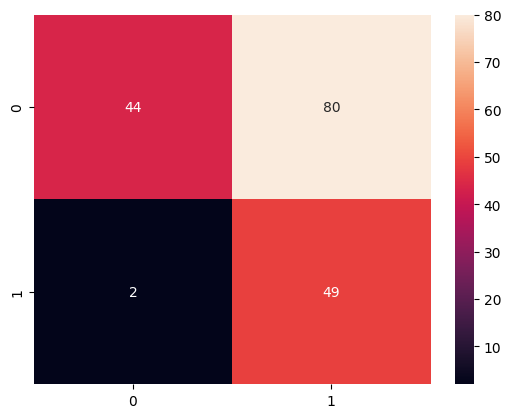

In [76]:
sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")


In [83]:
random_forest =RandomForestClassifier(max_depth=3,n_estimators=56,criterion='entropy')
random_forest.fit(x_train,y_train)
RandomForestClassifier(bootstrap=True,class_weight=None,criterion='entropy',max_depth=3,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=56,n_jobs=1,oob_score=False,random_state=None,verbose=0,warm_start=False)
#Predict Output
rf_predicted = random_forest.predict(x_test)
random_forest_score = round(random_forest.score(x_train, y_train) *100, 2)
random_forest_score_test = round(random_forest.score(x_test, y_test) *100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))


Random Forest Score: 
 75.49
Random Forest Test Score: 
 68.57
Accuracy: 
 0.6857142857142857
[[118   6]
 [ 49   2]]
              precision    recall  f1-score   support

           1       0.71      0.95      0.81       124
           2       0.25      0.04      0.07        51

    accuracy                           0.69       175
   macro avg       0.48      0.50      0.44       175
weighted avg       0.57      0.69      0.59       175



In [86]:
finx = df[['Total_Protiens','Albumin', 'Gender']]
finx.head(4)


,Total_Protiens,Albumin,Gender
0,6.8,3.3,1
1,7.5,3.2,1
2,7.0,3.3,1
3,6.8,3.4,1


In [87]:
x_train, x_test, y_train, y_test = train_test_split(finx, y,test_size=0.30, random_state=101)
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False,fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr',n_jobs=1,penalty='l2', random_state=None, solver='liblinear',tol=0.0001,verbose=0, warm_start=False)
# Predict Output
log_predicted= logreg.predict(x_test)
logreg_score = round(logreg.score(x_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(x_test, y_test) * 100, 2)
# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n',
classification_report(y_test,log_predicted))


Logistic Regression Training Score: 
 71.32
Logistic Regression Test Score: 
 71.43
Coefficient: 
 [[-5.74075104e-01  1.07112055e+00 -1.02546715e-05]]
Intercept: 
 [-0.61106411]
Accuracy: 
 0.7142857142857143
Confusion Matrix: 
 [[122   2]
 [ 48   3]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.98      0.83       124
           2       0.60      0.06      0.11        51

    accuracy                           0.71       175
   macro avg       0.66      0.52      0.47       175
weighted avg       0.68      0.71      0.62       175



<Axes: >

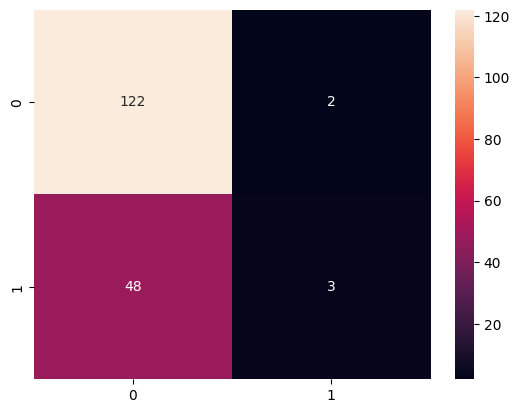

In [88]:
sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")


In [92]:
dt=DecisionTreeClassifier()
# Train the model using the training sets and check score
dt.fit(x_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini',max_depth=None,max_features=None, max_leaf_nodes=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,random_state=None,splitter='best')
# Predict Output
y_pred=dt.predict(x_test)
dt_score = round(dt.score(x_train, y_train) * 100, 2)
dt_test = round(dt.score(x_test, y_test) * 100, 2)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6114285714285714

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[96, 28],
       [40, 11]])

In [94]:
models = pd.DataFrame({'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','RandomForest','Decision Tree'],'Score': [ logreg_score, gauss_score,random_forest_score,dt_score],'Test Score': [ logreg_score_test, gauss_score_test,random_forest_score_test,dt_test]})
models.sort_values(by='Test Score', ascending=False)


,Model,Score,Test Score
0,Logistic Regression,71.32,71.43
2,RandomForest,75.49,68.57
3,Decision Tree,89.46,61.14
1,Gaussian Naive Bayes,55.88,53.14
